<hr>
<center>
    <h1>Resolução do desafio prático</h1>
</center>
<hr>

<b>Vaga</b>: Data Scientist

<b>Candidato</b>: Ariel Yssou Oliveira Fernandes


O contexto do desafio é reproduzido por comodidade:

"Apresentamos aqui um estudo de caso do município de Sorriso, situado no Mato Grosso (MT).
Objetiva-se efetuar análise geoespacial utilizando-se técnicas de Sensoriamento Remoto para
monitoramento de colheita agrícola.
Sorriso, é um dos principais produtores de soja do Brasil. Nesse estudo, nós separamos uma
região com doze pivôs centrais de irrigação, para monitoramento da safra (time series).
Utilizaremos apenas imagens dos satélites Sentinel 2A/2B MSI e Landsat 8 OLI, para que os
resultados sejam facilmente comparáveis entre os participantes.
Com essas imagens somos capazes de identificar padrões na vegetação com a assinatura espec-
tral de cada valor de pixel na imagem, e extrair dados relevantes para a nossa safra. Mais
precisamente isso, utilizaremos o NDVI (Normalized Difference Vegetation Index). O intervalo
de tempo para nossa análise será entre 01/01/2020 e 30/06/2020."

<h2>Ambiente</h2>
Para esta analise, sera usado o seguinte <i>framework</i>de bibliotecas e APIs:
<ul>
    <li><b>API</b> sentinelsat</li>
    <li><b>Analises e visualizações</b>: pandas, geopandas, matplotlib, shapely</li>
    <li><b>Extração de dados e manipulações</b>: rasterio, requests, zipfile</li>
</ul>
    
<h2>Imports iniciais</h2>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt

<h2>Inicializando o API</h2>
Iremos usar o API do Sentinel. Para tal sera utilizado uma conta no scihub do projeto copernicus "https://scihub.copernicus.eu/dhus" (que pode ser feita de graça e rapidamente)

In [2]:
from shapely.geometry import MultiPolygon, Polygon

user = 'arielyssou' ## change this!
password = '7cebolas' ## change this!

aoi_shp = gpd.read_file('./inputs/shp/sorriso-mt.shp')
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

footprint = None
for i in aoi_shp['geometry']:
    footprint = i
print (footprint)

products = api.query(footprint,
                     date = ('20200101', '20200630'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

POLYGON ((-55.578461 -12.983148, -55.578461 -12.896151, -55.477524 -12.896151, -55.477524 -12.983148, -55.578461 -12.983148))


As áreas detectadas para o território especificado (extraido diretamente do shapefile) e na janela temporal foram:

In [3]:
areas = api.to_geodataframe(products)
areas

/home/ariel/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,...,size,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry
f739b047-edd5-43eb-9e3d-1c1fe361e375,S2B_MSIL2A_20200625T140059_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-25T14:00:59.024Z, Instrument: MS...",false,2020-06-25 14:00:59.024,2020-06-25 14:00:59.024,2020-06-25 23:31:45.403,17253,...,1.01 GB,GS2B_20200625T140059_017253_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200625T140059_N0214_R067_T21LXF_2...,f739b047-edd5-43eb-9e3d-1c1fe361e375,"MULTIPOLYGON (((-56.07538 -13.65516, -55.06049..."
0081ecd1-a0ed-4a5a-8bdd-41595d260b30,S2B_MSIL2A_20200615T140059_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-15T14:00:59.024Z, Instrument: MS...",false,2020-06-15 14:00:59.024,2020-06-15 14:00:59.024,2020-06-16 05:46:55.333,17110,...,1.00 GB,GS2B_20200615T140059_017110_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200615T140059_N0214_R067_T21LXF_2...,0081ecd1-a0ed-4a5a-8bdd-41595d260b30,"MULTIPOLYGON (((-56.07539 -13.65516, -55.06048..."
d9c98e76-f1b1-4978-b112-bc45850b2fb7,S2A_MSIL2A_20200610T140101_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-10T14:01:01.024Z, Instrument: MS...",false,2020-06-10 14:01:01.024,2020-06-10 14:01:01.024,2020-06-10 20:33:56.837,25947,...,1.03 GB,GS2A_20200610T140101_025947_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200610T140101_N0214_R067_T21LXF_2...,d9c98e76-f1b1-4978-b112-bc45850b2fb7,"MULTIPOLYGON (((-56.07538 -13.65516, -55.06049..."
d346ef9b-68ab-4ec5-86df-8760bd1cd223,S2B_MSIL2A_20200605T140059_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-06-05T14:00:59.024Z, Instrument: MS...",false,2020-06-05 14:00:59.024,2020-06-05 14:00:59.024,2020-06-05 23:02:01.279,16967,...,1.01 GB,GS2B_20200605T140059_016967_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200605T140059_N0214_R067_T21LXF_2...,d346ef9b-68ab-4ec5-86df-8760bd1cd223,"MULTIPOLYGON (((-56.07538 -13.65516, -55.06049..."
572e02c7-996d-4d73-b814-93c2022cda42,S2A_MSIL2A_20200531T140101_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-31T14:01:01.024Z, Instrument: MS...",false,2020-05-31 14:01:01.024,2020-05-31 14:01:01.024,2020-05-31 21:46:38.617,25804,...,1019.57 MB,GS2A_20200531T140101_025804_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200531T140101_N0214_R067_T21LXF_2...,572e02c7-996d-4d73-b814-93c2022cda42,"MULTIPOLYGON (((-56.07538 -13.65516, -55.06049..."
898d811e-b7fd-418a-9a2d-50b054c52592,S2B_MSIL2A_20200526T140059_N0214_R067_T21LXF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-05-26T14:00:59.024Z, Instrument: MS...",false,2020-05-26 14:00:59.024,2020-05-26 14:00:59.024,2020-05-27 00:40:03.264,16824,...,1011.65 MB,GS2B_20200526T140059_016824_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200526T140059_N0214_R067_T21LXF_2...,898d811e-b7fd-418a-9a2d-50b054c52592,"MULTIPOLYGON (((-56.07538 -13.65516, -55.06049..."
f7ccb79b-b1c5-417c-bbf2-2470e20e3e55,S2A_MSIL2A_20200521T140101_N0214_R067_T21LXF_2...,https://sci

Dessas áreas, pdoemos extrar o indice de vegetação diretamente:

In [4]:
areas['vegetationpercentage']

f739b047-edd5-43eb-9e3d-1c1fe361e375    46.065331
0081ecd1-a0ed-4a5a-8bdd-41595d260b30    52.366513
d9c98e76-f1b1-4978-b112-bc45850b2fb7    53.435147
d346ef9b-68ab-4ec5-86df-8760bd1cd223    63.102138
572e02c7-996d-4d73-b814-93c2022cda42    75.230563
898d811e-b7fd-418a-9a2d-50b054c52592    81.737036
f7ccb79b-b1c5-417c-bbf2-2470e20e3e55    73.317546
9b35a889-6e1d-4e60-bfcb-3fb002af8fcd    96.962023
a536a4c3-2aa2-432d-8e2f-c4988388f839    76.241481
f1614c64-329b-412e-921f-1c7b9efd577a    79.046625
Name: vegetationpercentage, dtype: float64

Com esses dados já podemos começar um esboço da reposta da pergunta (c) do case:

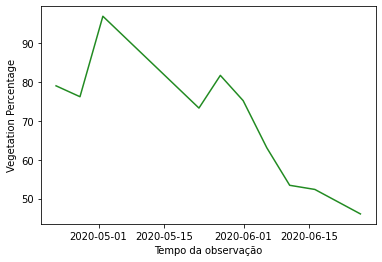

In [5]:
fig, ax = plt.subplots(1)

ax.plot(
    areas['ingestiondate'],
    areas['vegetationpercentage'],
    c = 'forestgreen' # para lembrar vegetação
)

ax.set_xlabel('Tempo da observação')
ax.set_ylabel("Vegetation Percentage")

plt.show()

Como não foram obtidas imagens para toda a janela temporal, não é possivel fazer uma analise mais detalhada da série temporal da vegetação. Dos dados é razoável supor que a colheita foi realizada entre dias 15/05/2020 e 15/06/2020. O plantio deve ter sido realizado antes do mês 05/2020, fora da janela observada.

<h2> Perguntas (a) e (b) </h2>
Para responder às perguntas (a) e (b), iremos pegar os dados da primeira imagem obtida e baixa-los
<h3>Extract</h3>
Eu acabei reiniciando o notebook (e por tanto a ordem de execução) então as proximas duas células estão fora da ordem. Para evitar ter de fazer o download de 1GB eu não executei essas células novamente, mas é perfeitamente possivel exacuta-las novamente na ordem em que as células estão sem afetar os resultados da análise.

In [15]:
data = api.download('f739b047-edd5-43eb-9e3d-1c1fe361e375')

Downloading: 100%|██████████| 1.09G/1.09G [01:40<00:00, 10.8MB/s]
MD5 checksumming: 100%|██████████| 1.09G/1.09G [00:01<00:00, 578MB/s]


In [20]:
import zipfile

zip_ref = zipfile.ZipFile('./S2B_MSIL2A_20200625T140059_N0214_R067_T21LXF_20200625T161954.zip', 'r')
zip_ref.extractall(r'./sentinel_data/')
zip_ref.close()

Com isso já temos os dados de todas as bandas localmente. Podemos analisar estes dados diretamente

In [6]:
import rasterio as rio

# Open Bands 4, 3 and 2 with Rasterio
R10 = './sentinel_data/S2B_MSIL2A_20200625T140059_N0214_R067_T21LXF_20200625T161954.SAFE/GRANULE/L2A_T21LXF_A017253_20200625T140054/IMG_DATA/R10m'
b4 = rio.open(R10+'/T21LXF_20200625T140059_B04_10m.jp2')
b3 = rio.open(R10+'/T21LXF_20200625T140059_B03_10m.jp2')
b2 = rio.open(R10+'/T21LXF_20200625T140059_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

Para observar apenas a área de interesse (e poupar espaço) podemos aplicar uma mask à Area of Interest (AOI)

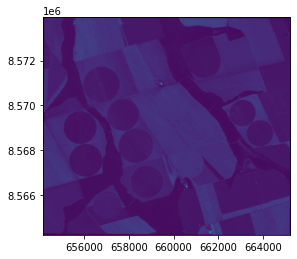

<AxesSubplot:>

In [10]:
import rasterio
import rasterio.plot as plot
from rasterio.mask import mask

aoi_proj = aoi_shp.to_crs(epsg = 32721)

with rio.open("RGB.tiff") as src:
    out_image, out_transform = mask(src, aoi_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r"./RGB_masked.tif", count=3)
plot.show(src)

Para analisar a saude da vejetação iremos nos basear no Normalized Difference Vegetation Index (NDVI) que pode ser obtido como
$ NDVI = \frac{nir - red}{(nir + red)}$, onde "$nir$" é <i>near infra red</i> e "$red$" é a banda vermelha (bandas 4 e 8 do Sentinel 2A)

In [11]:
# Open b4 and b8
b4 = rio.open(R10+'/T21LXF_20200625T140059_B04_10m.jp2')
b8 = rio.open(R10+'/T21LXF_20200625T140059_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

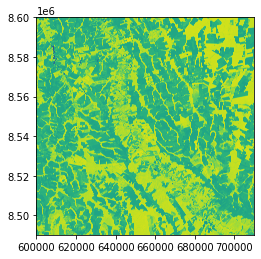

<AxesSubplot:>

In [12]:
src = rasterio.open(r"./NDVI.tif", count=3)
plot.show(src)

Para a AOI:

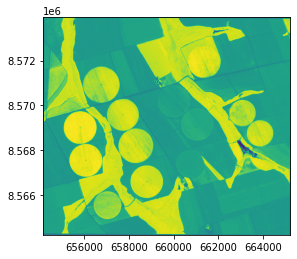

<AxesSubplot:>

In [13]:
aoi_proj = aoi_shp.to_crs(epsg = 32721)

with rio.open("NDVI.tif") as src:
    out_image, out_transform = mask(src, aoi_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("NDVI_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r"./NDVI_masked.tif", count=3)
plot.show(src)

In [18]:
pixel_ndvi = ndvi.reshape((10980, 10980))

Pixel com vejetação não saudável (menor valor de ndvi: 

In [24]:
i,j = np.unravel_index(pixel_ndvi.argmin(), pixel_ndvi.shape)
print(pixel_ndvi.min(), (i,j))

-0.993006993006993 (1337, 3926)


Pixel com vergetação saudável (maior valor de ndvi)

In [25]:
i,j = np.unravel_index(pixel_ndvi.argmax(), pixel_ndvi.shape)
print(pixel_ndvi.max(), (i,j))

0.9991958182549256 (3217, 10958)


<h2>Questão (d)</h2>
A estrutura desta resolução já contitui um esqueleto da estratégia de ETL utilizando um API. em resumo (em pseudo codigo):

In [ ]:
## EXTRACT
# start api
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
#get footprint
for i in aoi_shp['geometry']:
    footprint = i
#set extration query
products = api.query(footprint,
                     date = dateinterval, #Requered date interval
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))
## Storage 
for area in api.to_geodataframe(products).index:
    data = api.download(area)
    zip_ref = zipfile.ZipFile(f'./{area}.zip', 'r')
    zip_ref.extractall(r'./sentinel_data/')
    zip_ref.close()
    
## Transform (NDVI for example)
b4 = rio.open(R10+'/{area}.jp2')
b8 = rio.open(R10+'/{area}.jp2')
red = b4.read()
nir = b8.read()
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)